In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wrangle import wrangle_grades
import warnings
warnings.filterwarnings("ignore")

In [2]:
#plt. rec set defaults for matplotlib figures
plt.rc('font', size=14)
plt.rc('figure', figsize=(13,8))

In [4]:
df= wrangle_grades()

In [5]:
df.head()

,exam1,exam2,exam3,final_grade
0,100,90,95,96
1,98,93,96,95
2,85,83,87,87
3,83,80,86,85
4,93,90,96,97


In [6]:
from sklearn.model_selection import train_test_split

In [12]:
train_and_validate, test=train_test_split(df, test_size=.1, random_state=123)
train, validate= train_test_split(train_and_validate, test_size=.1, random_state=123)
train.shape, validate.shape, test.shape

((81, 4), (10, 4), (11, 4))

<h1><h1 style="color:lightcoral">Continuous and Continuous</h1>

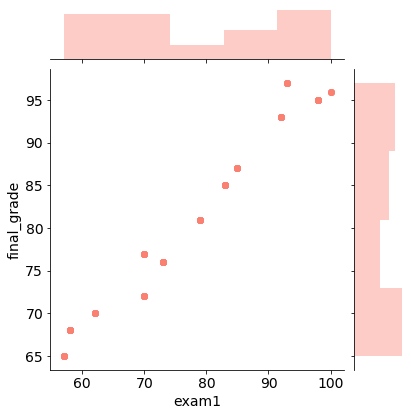

In [22]:
sns.jointplot(x='exam1', y='final_grade', data=train, color='salmon')

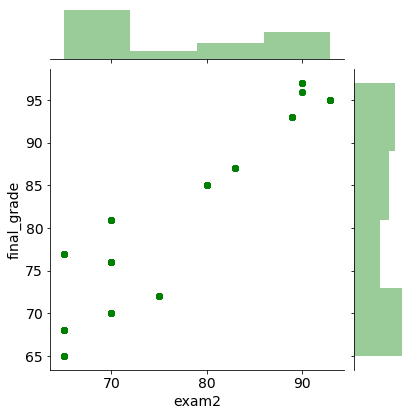

In [20]:
sns.jointplot(x='exam2', y='final_grade', data=train, color='green')

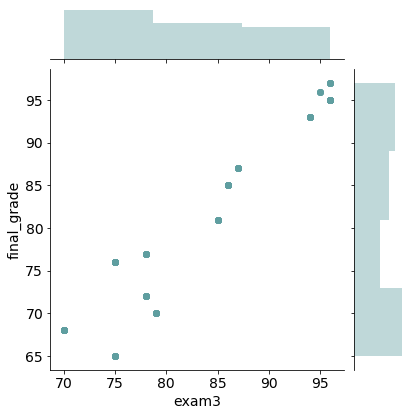

In [21]:
sns.jointplot(x='exam3', y='final_grade', data=train, color='cadetblue')

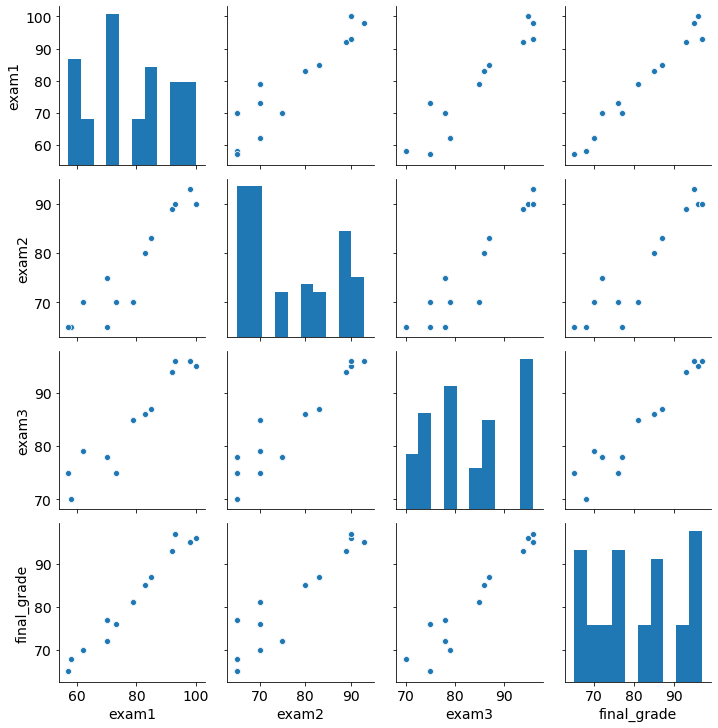

In [87]:
sns.pairplot(data=train)

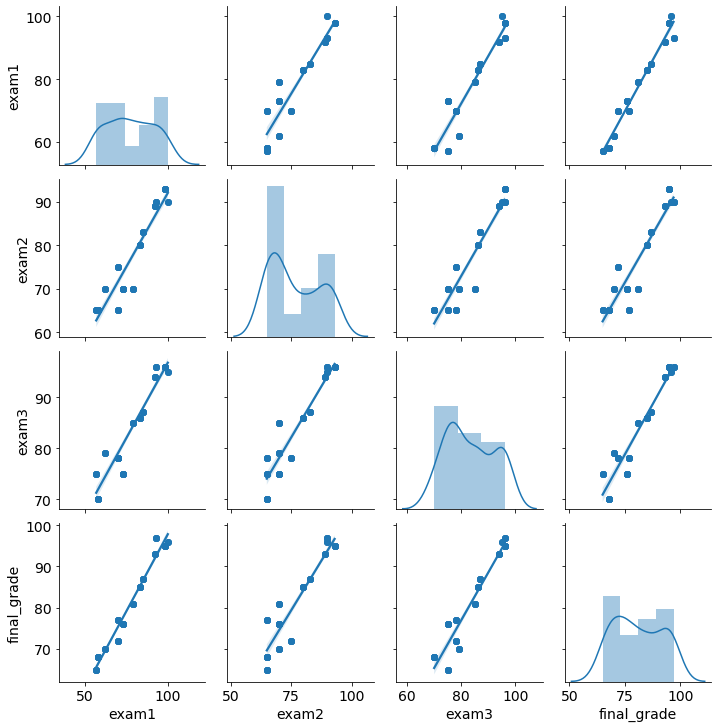

In [27]:
g= sns.PairGrid(train)
g.map_diag(sns.distplot)
g.map_offdiag(sns.regplot)

In [29]:
train.corr()

,exam1,exam2,exam3,final_grade
exam1,1.000000,0.934099,0.947911,0.985155
exam2,0.934099,1.000000,0.938353,0.926828
exam3,0.947911,0.938353,1.000000,0.954037
final_grade,0.985155,0.926828,0.954037,1.000000


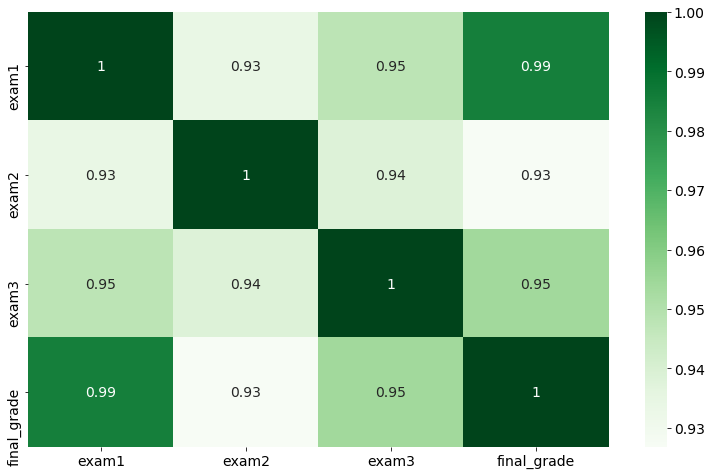

In [53]:
sns.heatmap(train.corr(), cmap= "Greens", annot=True)

Takeaways:
<li>exam 2 has the least correlation with the final grade </li>
<li> exam 1 has the highest correlation with the final grade </li>
questions:
<li> why does exam 2 have a lower correlation? </li>
students are slacking midsemester
the material covered on the final isn't the 

<h1><h1 style="color:lightcoral">Continuous and Categorical</h1>

In [42]:
pd.cut(train.exam1, bins=[0, 70, 80, 90, 105], labels= ['D','C','B','A']).value_counts()

F    32
A    22
C    14
B    13
Name: exam1, dtype: int64

In [48]:
train['exam1_letter_grade']=pd.cut(train.exam1, bins=[0, 70, 80, 90, 105], labels= ['D','C','B','A'])
train.head()

,exam1,exam2,exam3,final_grade,exam1_letter_grade
1,98,93,96,95,A
20,73,70,75,76,C
78,100,90,95,96,A
29,83,80,86,85,B
75,58,65,70,68,D


Viz types for cont x categorical:
<ul>
<li>box plot</li>
<li>bar chart</li>
<li>violin</li>
<li>swarm plot</li>

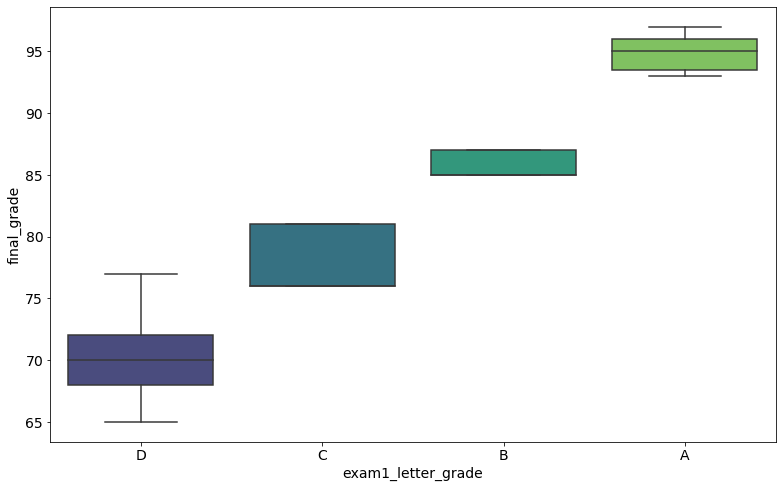

In [51]:
sns.boxplot(data= train, y='final_grade', x='exam1_letter_grade', palette='viridis')

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

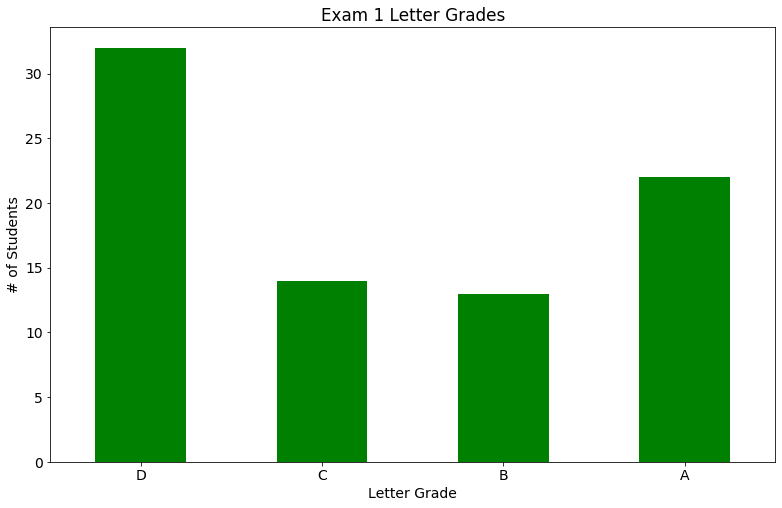

In [65]:
train.exam1_letter_grade.value_counts().sort_index().plot.bar(color='green')
plt.ylabel('# of Students')
plt.title('Exam 1 Letter Grades')
plt.xlabel('Letter Grade')
plt.xticks(rotation=0)


<h1><h1 style="color:lightcoral">Categorical and Categorical</h1>

In [98]:
# make a fake category
np.random.seed(13)
train['classroom']=np. random.choice(['one', 'two'], train.shape[0])
train.head()

,exam1,exam2,exam3,final_grade,exam1_letter_grade,classroom
1,98,93,96,95,A,one
20,73,70,75,76,C,one
78,100,90,95,96,A,one
29,83,80,86,85,B,one
75,58,65,70,68,D,one


(0, 100)

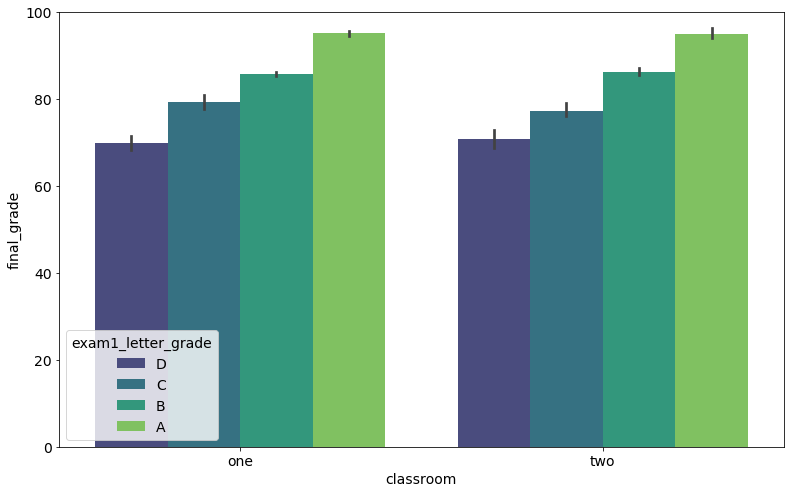

In [99]:
sns.barplot(data=train, y='final_grade', x='classroom', hue='exam1_letter_grade',palette='viridis')
plt.ylim(0, 100)

(0, 100)

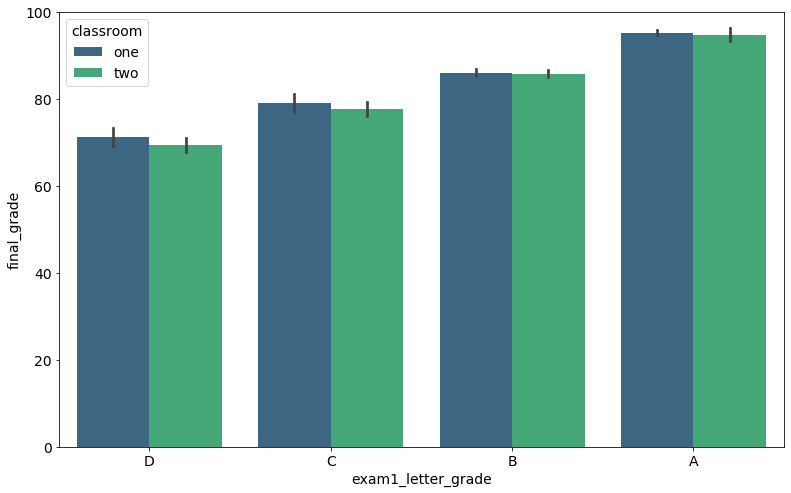

In [84]:
sns.barplot(data=train, y='final_grade', x='exam1_letter_grade', hue='classroom',palette='viridis')
plt.ylim(0, 100)

Takeaway: the distribution of grades in classroom one and two are about the same. <br><br><br>
Classroom doesn't impact final grade? Let's run a hypothesis test to check.

alpha= .05<br><br>
$H_0$: There is no difference in final grade between classroom 1and classroom 2.
$H_a$: There is a difference in final grade between classroom 1 and classroom 2.   

In [91]:
from scipy import stats
stats.ttest_ind(
    train[train.classroom=='one'].final_grade,
    train[train.classroom=='two'].final_grade,
    equal_var= False,
)

Ttest_indResult(statistic=2.280491002945514, pvalue=0.025327198363860267)

with a p value of 0.25, we reject the null hypothesis that there is no difference in final grade between classroom one and classroom two.
p-value= P(observe our data due to change | H0)

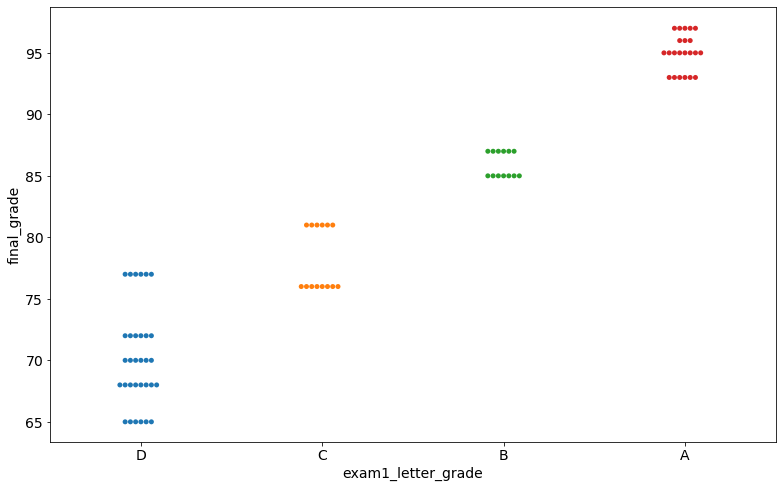

In [92]:
sns.swarmplot(data=train, y='final_grade', x='exam1_letter_grade')

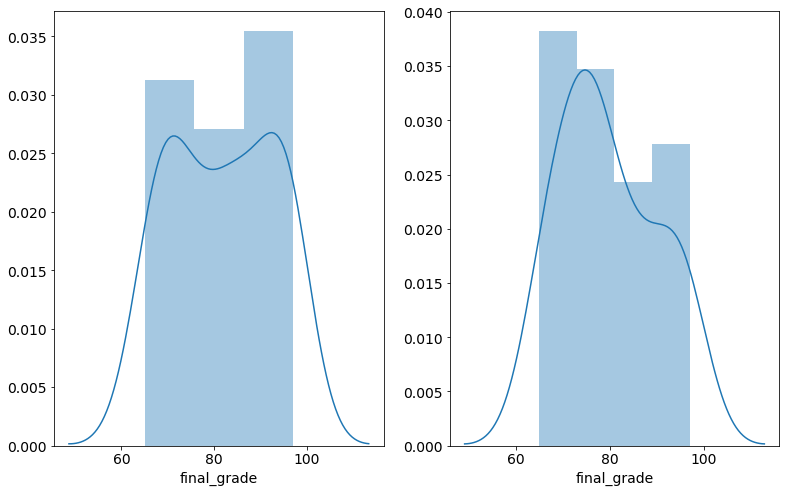

In [100]:
plt.subplot(121)
sns.distplot(train[train.classroom=='one'].final_grade)
plt.subplot(122)
sns.distplot(train[train.classroom=='two'].final_grade)

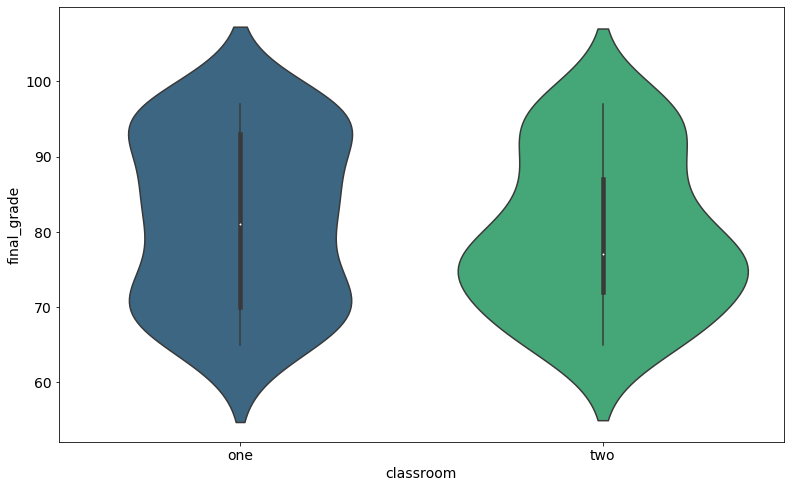

In [101]:
sns.violinplot(data=train, y='final_grade', x='classroom', palette= 'viridis')

In [104]:
# normalize let us go from counts --> proportions
pd.crosstab(train.exam1_letter_grade, train.classroom, normalize=True).round(3)

classroom,one,two
exam1_letter_grade,,
D,0.210,0.185
C,0.074,0.099
B,0.099,0.062
A,0.173,0.099


In [105]:
train.head()

,exam1,exam2,exam3,final_grade,exam1_letter_grade,classroom
1,98,93,96,95,A,one
20,73,70,75,76,C,one
78,100,90,95,96,A,one
29,83,80,86,85,B,one
75,58,65,70,68,D,one
